In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df21 = pd.read_csv('../data/predictions_2021.csv')
df21.head()

,sofifa_id,name,overall_2020,predicted_overall_2021
0,158023,L. Messi,94,94.455997
1,20801,Cristiano Ronaldo,93,92.250445
2,190871,Neymar Jr,92,93.067969
3,183277,E. Hazard,91,91.645787
4,192985,K. De Bruyne,91,91.560027


In [3]:
df22 = pd.read_csv('../data/predictions_2022.csv')
df22.head()

,sofifa_id,name,overall_2020,predicted_overall_2022
0,158023,L. Messi,94,95.604565
1,20801,Cristiano Ronaldo,93,91.681438
2,190871,Neymar Jr,92,94.974208
3,183277,E. Hazard,91,92.948926
4,192985,K. De Bruyne,91,92.862711


In [4]:
merged = df21.merge(df22[['sofifa_id', 'predicted_overall_2022']], on='sofifa_id')
merged.head()

,sofifa_id,name,overall_2020,predicted_overall_2021,predicted_overall_2022
0,158023,L. Messi,94,94.455997,95.604565
1,20801,Cristiano Ronaldo,93,92.250445,91.681438
2,190871,Neymar Jr,92,93.067969,94.974208
3,183277,E. Hazard,91,91.645787,92.948926
4,192985,K. De Bruyne,91,91.560027,92.862711


In [5]:
df23 = pd.read_csv('../data/predictions_2023.csv')
df23.head()

,sofifa_id,name,club,overall_2020,predicted_overall_2023
0,158023,L. Messi,FC Barcelona,94,102.339826
1,20801,Cristiano Ronaldo,Juventus,93,95.956756
2,190871,Neymar Jr,Paris Saint-Germain,92,96.748913
3,183277,E. Hazard,Real Madrid,91,98.252710
4,192985,K. De Bruyne,Manchester City,91,96.355639


In [6]:
merged = merged.merge(df23[['sofifa_id', 'predicted_overall_2023', 'club']], on='sofifa_id')
merged.head()

,sofifa_id,name,overall_2020,predicted_overall_2021,predicted_overall_2022,predicted_overall_2023,club
0,158023,L. Messi,94,94.455997,95.604565,102.339826,FC Barcelona
1,20801,Cristiano Ronaldo,93,92.250445,91.681438,95.956756,Juventus
2,190871,Neymar Jr,92,93.067969,94.974208,96.748913,Paris Saint-Germain
3,183277,E. Hazard,91,91.645787,92.948926,98.252710,Real Madrid
4,192985,K. De Bruyne,91,91.560027,92.862711,96.355639,Manchester City


In [7]:
merged = merged[['sofifa_id', 'name', 'club', 'overall_2020', 'predicted_overall_2021',
       'predicted_overall_2022', 'predicted_overall_2023']]

In [8]:
merged.head()

,sofifa_id,name,club,overall_2020,predicted_overall_2021,predicted_overall_2022,predicted_overall_2023
0,158023,L. Messi,FC Barcelona,94,94.455997,95.604565,102.339826
1,20801,Cristiano Ronaldo,Juventus,93,92.250445,91.681438,95.956756
2,190871,Neymar Jr,Paris Saint-Germain,92,93.067969,94.974208,96.748913
3,183277,E. Hazard,Real Madrid,91,91.645787,92.948926,98.252710
4,192985,K. De Bruyne,Manchester City,91,91.560027,92.862711,96.355639


In [9]:
# Search database with player's name

name = input("Enter player's name: ")

merged[merged['name'].str.contains(name)]

Enter player's name: Lainez


,sofifa_id,name,club,overall_2020,predicted_overall_2021,predicted_overall_2022,predicted_overall_2023
2977,237995,D. Lainez,Real Betis,72,73.257491,74.208552,74.991676


In [10]:
# Once located the player, introduce its id

player_id = int(input("Enter player's id: "))

Enter player's id: 237995


In [14]:
player = merged.groupby('sofifa_id', as_index=False).agg('mean')
player = player.loc[player['sofifa_id']==player_id]

player = player.T
player.columns = ['overalls']

player = player[1:]
player

,overalls
overall_2020,72.000000
predicted_overall_2021,73.257491
predicted_overall_2022,74.208552
predicted_overall_2023,74.991676


In [12]:
#player['MAE_2021'] = 1.619
#player['MAE_2022'] = 2.405
#player['MAE_2023'] = 2.687

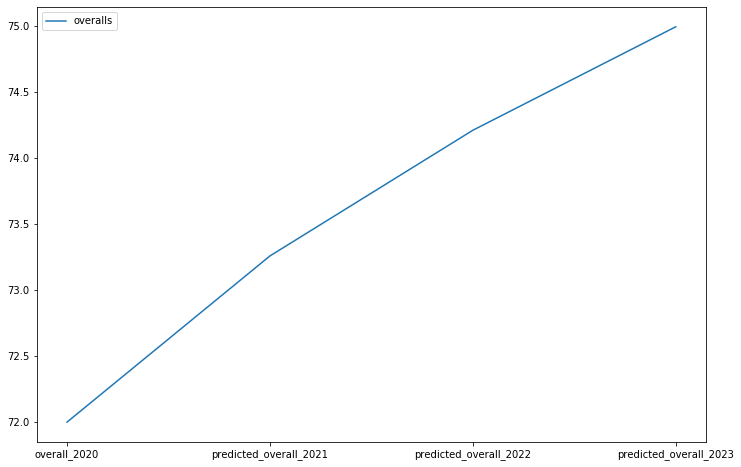

In [15]:
plt.figure(figsize=(12,8))
sns.lineplot(data=player, err_style='band')

plt.show()